In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import os
import statsmodels.formula.api as sfm
from mpl_toolkits.mplot3d import Axes3D

In [4]:
players = pd.read_csv('../data/players.csv')

In [5]:
players.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Trey Adams\AdamTr00,OL,Washington,College Stats,6-8,318,5.60,24.5,NaN,92.0,NaN,NaN,NaN
1,Hakeem Adeniji\AdenHa00,OL,Kansas,College Stats,6-4,302,5.17,34.0,26.0,115.0,NaN,NaN,Cincinnati Bengals / 6th / 180th pick / 2020
2,McTelvin Agim\AgimMc00,DL,Arkansas,College Stats,6-3,309,4.98,NaN,27.0,NaN,NaN,NaN,Denver Broncos / 3rd / 95th pick / 2020
3,Salvon Ahmed\AhmeSa00,RB,Washington,College Stats,5-11,197,4.62,34.5,NaN,120.0,NaN,NaN,NaN
4,Brandon Aiyuk\AiyuBr00,WR,Arizona State,College Stats,6-0,205,4.50,40.0,11.0,128.0,NaN,NaN,San Francisco 49ers / 1st / 25th pick / 2020


In [6]:
#Remove player codes coming after their nameson column 'Player'
sep = '\\'
players['Player'] = players['Player'].str.split(sep).str[0]

#Since we need only team info on 'Drafted (tm/rnd/yr)' column, change the column name to 'team' and remove the rest data since not needed
sep = '/'
players['Team'] =  players['Drafted (tm/rnd/yr)']
players['Team'] = players['Team'].str.split(sep).str[0]
players = players.drop(['Drafted (tm/rnd/yr)'], axis =1)

# Convert String(Fot height) Into Integer(Inch Height)
players['Ht']= players['Ht'].str[0].astype('int64')*12 + players['Ht'].str[2:].astype('int64')

# Remove ' ' (extra space) at the end of column 'team'
players['Team'] = players['Team'].str[:-1]

#dropping players with no teams
players = players[~players['Team'].isnull()]

players.head()

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team
1,Hakeem Adeniji,OL,Kansas,College Stats,76,302,5.17,34.0,26.0,115.0,NaN,NaN,Cincinnati Bengals
2,McTelvin Agim,DL,Arkansas,College Stats,75,309,4.98,NaN,27.0,NaN,NaN,NaN,Denver Broncos
4,Brandon Aiyuk,WR,Arizona State,College Stats,72,205,4.50,40.0,11.0,128.0,NaN,NaN,San Francisco 49ers
5,Cam Akers,RB,Florida State,College Stats,70,217,4.47,35.5,20.0,122.0,NaN,4.42,Los Angeles Rams
6,Bradlee Anae,DL,Utah,College Stats,75,257,4.93,31.0,25.0,115.0,7.44,4.43,Dallas Cowboys


In [7]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 1 to 4291
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2787 non-null   object 
 1   Pos         2787 non-null   object 
 2   School      2787 non-null   object 
 3   College     2546 non-null   object 
 4   Ht          2787 non-null   int64  
 5   Wt          2787 non-null   int64  
 6   40yd        2616 non-null   float64
 7   Vertical    2260 non-null   float64
 8   Bench       2084 non-null   float64
 9   Broad Jump  2230 non-null   float64
 10  3Cone       1820 non-null   float64
 11  Shuttle     1868 non-null   float64
 12  Team        2787 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 304.8+ KB


In [8]:
team_list = pd.read_csv('../data/list.csv')

# Rename column 'Tm' to 'Team'
team_list = team_list.rename(columns={'Tm':"Team"})


In [9]:
# Merge team_list into players to see the team's winning rate for each player 
players = players.merge(team_list)
players.head()


# Drop unnecessary column 
players = players.drop('Unnamed: 0', axis =1 )

In [10]:
players = players.rename(columns={'Rate':'Winning Rate'})
players

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Team,From,Winning Rate
0,Hakeem Adeniji,OL,Kansas,College Stats,76,302,5.17,34.0,26.0,115.0,NaN,NaN,Cincinnati Bengals,1968,0.447
1,Markus Bailey,LB,Purdue,College Stats,72,235,NaN,NaN,15.0,NaN,NaN,NaN,Cincinnati Bengals,1968,0.447
2,Joe Burrow,QB,LSU,College Stats,75,221,NaN,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals,1968,0.447
3,Akeem Davis-Gaither,LB,Appalachian State,College Stats,73,224,NaN,NaN,21.0,NaN,NaN,NaN,Cincinnati Bengals,1968,0.447
4,Tee Higgins,WR,Clemson,College Stats,76,216,NaN,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals,1968,0.447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,Chris Horton,SS,UCLA,College Stats,72,212,4.54,28.5,14.0,109.0,7.34,4.35,Washington Redskins,1932,0.498
2662,Malcolm Kelly,WR,Oklahoma,College Stats,76,224,4.68,NaN,NaN,NaN,NaN,NaN,Washington Redskins,1932,0.498
2663,Chad Rinehart,OG,New Mexico,NaN,77,320,5.42,28.5,26.0,106.0,7.84,4.56,Washington Redskins,1932,0.498
2664,Devin Thomas,WR,Michigan State,College Stats,74,216,4.41,28.0,NaN,126.0,7.15,4.26,Washington Redskins,1932,0.498


In [11]:
os.getcwd()

'/home/jovyan/work/Desktop/gNYC13/capstone1/notebooks'

In [12]:
os.chdir('../src')
os.getcwd()

'/home/jovyan/work/Desktop/gNYC13/capstone1/src'

In [13]:
from helper import corr_heatmap
import matplotlib.pyplot as plt

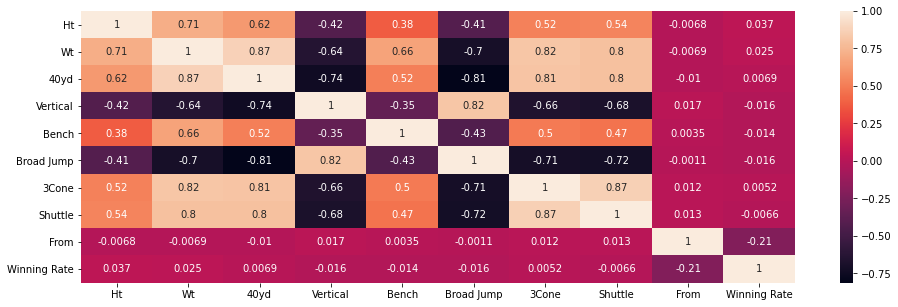

In [14]:
corr_heatmap(players)
plt.savefig("../img/PTCorr.png")

## No correlations found between winning rate & PT 

In [15]:
#Cowboys players from randomly selected year.
cowboys = pd.read_csv('../data/cowboys.csv')

In [16]:
cowboys["Winning Rate"] = 0.571

In [17]:
cowboys.columns

Index(['No.', 'Player', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD', 'Lng',
       'Y/A', 'Y/G', 'A/G', 'Tgt', 'Rec', 'Yds.1', 'Y/R', 'TD.1', 'Lng.1',
       'R/G', 'Y/G.1', 'Ctch%', 'Y/Tgt', 'Touch', 'Y/Tch', 'YScm', 'RRTD',
       'Fmb', 'Winning Rate'],
      dtype='object')

In [18]:
cowboys = cowboys[['Age', 'Pos', 'Ctch%', 'Winning Rate']]

In [19]:
cowboys["Ctch%"] = cowboys["Ctch%"].str[:-1].astype(float)

cowboys

,Age,Pos,Ctch%,Winning Rate
0,23,RB,79.7,0.571
1,24,NaN,100.0,0.571
2,26,QB,NaN,0.571
3,26,FB,84.2,0.571
4,28,NaN,75.0,0.571
...,...,...,...,...
142,28,WR,44.2,0.571
143,22,te,50.0,0.571
144,24,NaN,58.3,0.571
145,22,NaN,77.8,0.571


In [20]:
cowboys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           147 non-null    int64  
 1   Pos           75 non-null     object 
 2   Ctch%         114 non-null    float64
 3   Winning Rate  147 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.7+ KB


In [21]:
cowboys["Ctch%"].mean()

68.45438596491229

In [22]:
#Bucs players from randomly selected years

bucc = pd.read_csv('../data/bucs.csv')

In [23]:
bucc["Winning Rate"] = 0.389

In [24]:
bucc = bucc[['Age', 'Pos', 'Ctch%', 'Winning Rate']]
bucc

,Age,Pos,Ctch%,Winning Rate
0,24,RB,84.0%,0.389
1,31,NaN,63.0%,0.389
2,29,QB,NaN,0.389
3,24,FB,73.0%,0.389
4,27,NaN,100.0%,0.389
...,...,...,...,...
133,29,TE,69.2%,0.389
134,24,NaN,71.4%,0.389
135,27,NaN,50.0%,0.389
136,37,NaN,100.0%,0.389


In [25]:
bucc["Ctch%"] = bucc["Ctch%"].str[:-1].astype(float)

Text(0.5, 0, 'Cowboys Catching %')

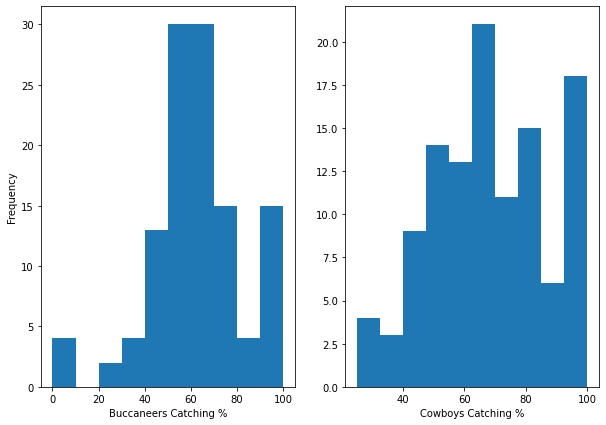

In [26]:
fig = plt.figure(figsize = (10,7))

plt.subplot(1, 2, 1)
plt.hist(bucc["Ctch%"], bins = 10)
plt.xlabel("Buccaneers Catching %")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
ax2 = plt.hist(cowboys["Ctch%"], bins = 10)
plt.xlabel("Cowboys Catching %")


## ^^ Since the number of sample is not big enough, I will execute bootstrap sampling as below. H0: Team with a high winning rate does not have a high catch %

In [31]:
from helper import bootstrap_sample_mean, bootstrap_sample_medians

In [32]:
x = np.array(bucc["Ctch%"])
x = x[~np.isnan(x)]
y = np.array(cowboys["Ctch%"])
y = y[~np.isnan(y)]

In [33]:
bucc_med = bootstrap_sample_medians(x)
cowboys_med = bootstrap_sample_medians(y)
bucc_mean = bootstrap_sample_mean(x)
cowboys_mean = bootstrap_sample_mean(y)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


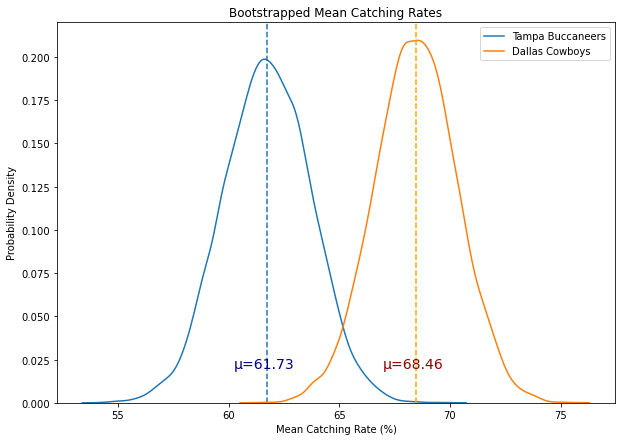

In [35]:
fig, ax = plt.subplots(figsize = (10,7))
sns.distplot(bucc_mean, hist=False, label = "Tampa Buccaneers")
ax.axvline(np.mean(bucc_mean), linestyle="--") 
sns.distplot(cowboys_mean, hist=False, label = "Dallas Cowboys")
ax.axvline(np.mean(cowboys_mean), linestyle="--", color ="orange") 
ax.text(np.mean(bucc_mean)-1.5, 0.02, f"μ={round(np.mean(bucc_mean),2)}", fontsize=14, color="navy")
ax.text(np.mean(cowboys_mean)-1.5, 0.02, f"μ={round(np.mean(cowboys_mean),2)}", fontsize=14, color="darkred")
plt.xlabel("Mean Catching Rate (%)")
plt.ylabel("Probability Density")
plt.title("Bootstrapped Mean Catching Rates")
plt.legend()
plt.savefig("bootstrap.png")

In [847]:
np.mean(bucc_mean), np.mean(cowboys_mean)

(61.75934410256411, 68.46546692982457)

In [848]:
print (stats.ttest_ind(bucc_mean, cowboys_mean))
print (f"P-value between Two Bootstrapped Samples: {stats.ttest_ind(bucc_mean, cowboys_mean)[1]}")

Ttest_indResult(statistic=-251.1158264757767, pvalue=0.0)
P-value between Two Bootstrapped Samples: 0.0


## ^^ p-value: 0.0 -> Reject Null Hypothesis  (H0: Team with a high winning rate does not have a high catch %)

In [36]:
passing = pd.read_csv('../data/Career_Stats_Passing.csv')

,Year,Games Played,Passes Attempted,Average Completion %,Pass Attempts Per Game,Passer Rating,Unnamed: 0,From,Winning Rate
Team,,,,,,,,,
Arizona Cardinals,2005.166667,12.833333,442.166667,62.133333,34.433333,85.050000,0.0,1920.0,0.424
Atlanta Falcons,1994.111111,14.611111,394.833333,57.022222,26.961111,80.305556,1.0,1966.0,0.440
Baltimore Ravens,1997.333333,13.666667,446.333333,56.566667,32.400000,81.933333,2.0,1996.0,0.563
Buffalo Bills,1985.741935,14.258065,406.387097,55.832258,28.525806,75.212903,3.0,1960.0,0.469
Carolina Panthers,2004.750000,14.625000,438.000000,58.287500,30.012500,77.762500,4.0,1995.0,0.489
Chicago Bears,1986.000000,14.500000,373.833333,55.308333,25.933333,71.083333,5.0,1920.0,0.567
Cincinnati Bengals,1985.454545,14.136364,395.454545,58.045455,28.040909,81.872727,6.0,1968.0,0.447
Cleveland Browns,1986.214286,13.428571,384.000000,56.178571,28.735714,74.414286,7.0,1946.0,0.510
Dallas Cowboys,1995.733333,14.466667,419.400000,61.320000,29.060000,81.766667,8.0,1960.0,0.571


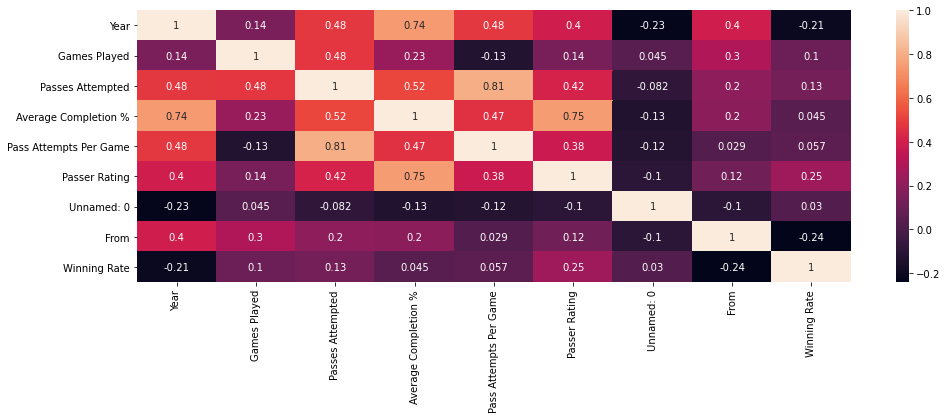

In [37]:
# Because we reject the null hypothesis above, let's apply this to entire teams. 

passing = passing[ passing["Passes Attempted"] != "--" ]
passing = passing[passing["Position"] != "QB"]
passing ["Passes Attempted"] = passing["Passes Attempted"].astype('int64')
passing = passing[ passing["Passes Attempted"] > 300]
passing = passing[ passing["Completion Percentage"] != "--" ]
passing["Completion Percentage"] = passing["Completion Percentage"].astype('float')
passing = passing.merge(team_list)
passing = passing.groupby("Team").mean()
passing = passing.rename(columns = {"Rate":"Winning Rate", "Completion Percentage" : "Average Completion %"})

corr_heatmap(passing)

passing

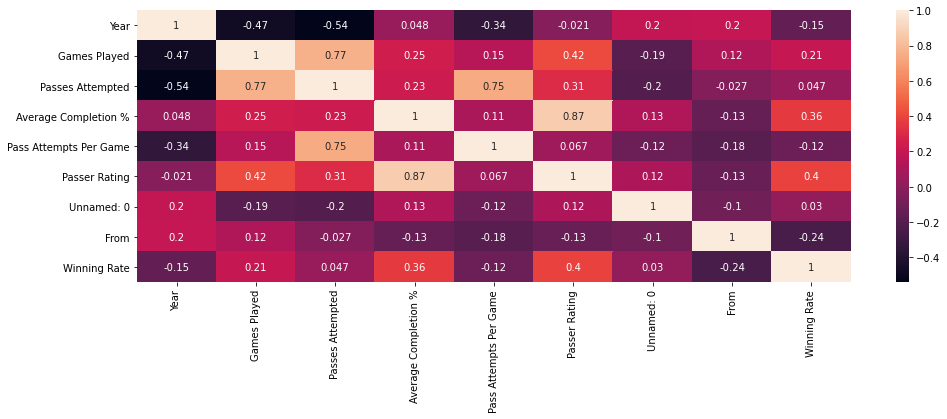

In [38]:
# Only QBs

QB = passing = pd.read_csv('../data/Career_Stats_Passing.csv')

QB = QB[QB["Position"] == "QB"]
QB = QB[ QB["Completion Percentage"] != "--" ]
QB["Completion Percentage"] = QB["Completion Percentage"].astype('float')
QB ["Passes Attempted"] = QB["Passes Attempted"].astype('int64')
QB = QB[ QB["Passes Attempted"] > 300]
QB = QB.merge(team_list)
QB = QB.groupby("Team").mean()
QB = QB.rename(columns = {"Rate":"Winning Rate", "Completion Percentage" : "Average Completion %"})

corr_heatmap(QB)

In [274]:
xx = np.linspace(50,70,100)
best_line =b.params['const'] + b.params["Completion Percentage"]*xx
b.params

const                    0.454469
Completion Percentage    0.000828
dtype: float64

Text(0.5, 1.0, 'Relationship between Winning Rate & Catching %')

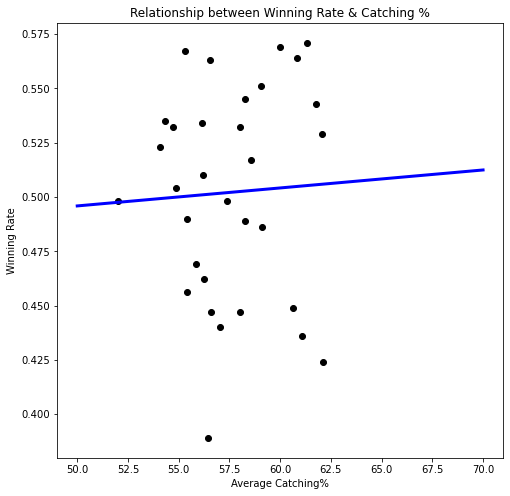

In [352]:
# Scatter plot for Catching% and linear regression 
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y = passing["Winning Rate"], x =passing["Completion Percentage"], color = 'k')
ax.plot(xx, best_line, color='b', lw=3)
plt.xlabel("Average Catching%")
plt.ylabel("Winning Rate")
plt.title("Relationship between Winning Rate & Catching %")

## ^^ This data is not valid, because catching % data hadn't been collected until 1992, whereas the inning rate is the all time figure

In [41]:
# Quarterbacks' completion rate 

x2 = QB["Winning Rate"]
y2 = sm.add_constant(QB["Average Completion %"])
a2 = sm.OLS(x2,y2)
a2

In [42]:
b2 = a2.fit()
b2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Winning Rate   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4.380
Date:                Wed, 04 Nov 2020   Prob (F-statistic):             0.0452
Time:                        00:57:11   Log-Likelihood:                 51.852
No. Observations:                  31   AIC:                            -99.70
Df Residuals:                      29   BIC:                            -96.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1279      0.179      0.714      0.481      -0.238       0.494
Average Completion %     0.0061      0.003      2.093      0.045       0.000       0.012
==============================================================================
Omnibus:                        3.800   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.228
Skew:                          -0.425   Prob(JB):                        0.328
Kurtosis:                       2.000   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
b2.params

const                   0.127905
Average Completion %    0.006056
dtype: float64

In [44]:
x2.head(), y2.head()

(Team
 Arizona Cardinals    0.424
 Atlanta Falcons      0.440
 Baltimore Ravens     0.563
 Buffalo Bills        0.469
 Carolina Panthers    0.489
 Name: Winning Rate, dtype: float64,
                    const  Average Completion %
 Team                                          
 Arizona Cardinals    1.0             59.360000
 Atlanta Falcons      1.0             64.611111
 Baltimore Ravens     1.0             61.488889
 Buffalo Bills        1.0             60.766667
 Carolina Panthers    1.0             58.433333)

In [45]:
b2.predict([1,50])

array([0.43071452])

In [46]:
xx2 = np.linspace(50,70,100)
best_line2 =b2.params['const'] + b2.params["Average Completion %"]*xx2

Text(0.5, 1.0, 'Relationship Between Completion Rate and Winning Rate')

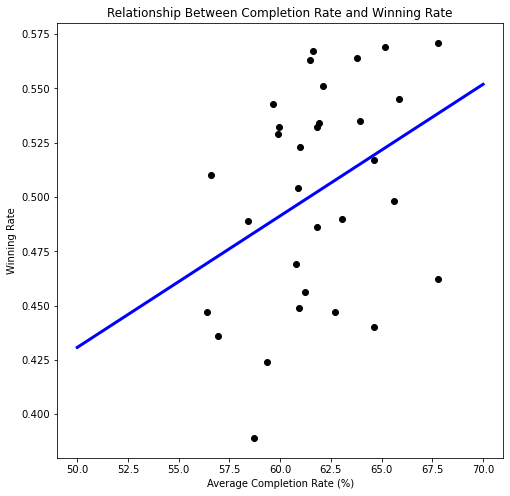

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y = QB["Winning Rate"], x = QB["Average Completion %"], color = 'k')
ax.plot(xx2, best_line2, color='b', lw=3)
plt.xlabel("Average Completion Rate (%)")
plt.ylabel("Winning Rate")
plt.title("Relationship Between Completion Rate and Winning Rate")

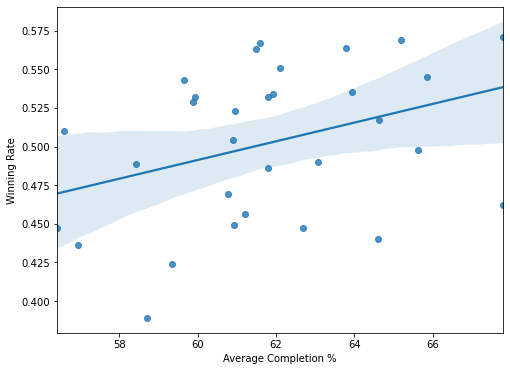

In [59]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x= "Average Completion %", y= "Winning Rate", data=QB )
fig.savefig("../img/Completion.png")

In [56]:
# Shaded area shows the confidence interval 

## Let's look at punt data

In [60]:
punt = pd.read_csv("../data/Career_Stats_Punt_Return.csv")
punt.head()

,Player Id,Name,Position,Year,Team,Games Played,Returns,Yards Returned,Yards Per Return,Longest Return,Returns for TDs,Returns Longer than 20 Yards,Returns Longer than 40 Yards,Fair Catches,Fumbles
0,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Bears,3,1,15,15.0,--,0,--,--,0,--
1,fredevans/2513736,"Evans, Fred",NaN,1948,Chicago Rockets,0,--,--,--,--,--,--,--,--,--
2,fredevans/2513736,"Evans, Fred",NaN,1947,Chicago Rockets,0,--,--,--,--,--,--,--,--,--
3,fredevans/2513736,"Evans, Fred",NaN,1947,Buffalo Bills,0,--,--,--,--,--,--,--,--,--
4,fredevans/2513736,"Evans, Fred",NaN,1946,Cleveland Browns,0,--,--,--,--,--,--,--,--,--


In [61]:
punt.dropna(subset = ["Yards Per Return"], inplace=True)
punt = punt[punt["Yards Per Return"] != "--"]

In [62]:
punt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 8675
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Player Id                     3494 non-null   object
 1   Name                          3494 non-null   object
 2   Position                      441 non-null    object
 3   Year                          3494 non-null   int64 
 4   Team                          3494 non-null   object
 5   Games Played                  3494 non-null   int64 
 6   Returns                       3494 non-null   object
 7   Yards Returned                3494 non-null   object
 8   Yards Per Return              3494 non-null   object
 9   Longest Return                3494 non-null   object
 10  Returns for TDs               3494 non-null   object
 11  Returns Longer than 20 Yards  3494 non-null   object
 12  Returns Longer than 40 Yards  3494 non-null   object
 13  Fair Catches      

In [63]:
punt["Yards Per Return"] = punt["Yards Per Return"].astype('float')

In [64]:
punt = punt.merge(team_list)
punt = punt.rename(columns={"Rate":"Winning Rate"})
punt = punt.groupby("Team").mean()
punt = punt.rename(columns={"Yards Per Return":"Average Yards Per Return"})

,Year,Games Played,Average Yards Per Return,Unnamed: 0,From,Winning Rate
Team,,,,,,
Arizona Cardinals,2006.657895,14.342105,5.715789,0.0,1920.0,0.424
Atlanta Falcons,1991.766234,12.493506,6.083117,1.0,1966.0,0.440
Baltimore Ravens,2006.392157,12.019608,9.752941,2.0,1996.0,0.563
Buffalo Bills,1987.656250,11.843750,8.417708,3.0,1960.0,0.469
Carolina Panthers,2006.928571,13.738095,7.166667,4.0,1995.0,0.489
Chicago Bears,1973.103448,11.579310,8.333793,5.0,1920.0,0.567
Cincinnati Bengals,1990.072289,13.277108,7.883133,6.0,1968.0,0.447
Cleveland Browns,1978.124031,11.891473,7.999225,7.0,1946.0,0.510
Dallas Cowboys,1988.688073,12.513761,6.963303,8.0,1960.0,0.571


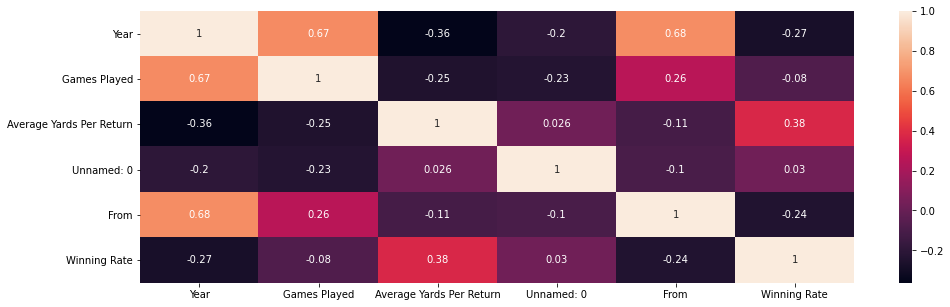

In [65]:
corr_heatmap(punt)
punt

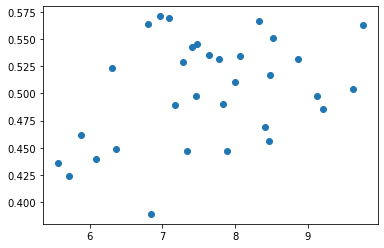

In [66]:
plt.scatter(punt["Average Yards Per Return"], punt["Winning Rate"])


In [67]:
x3 = punt["Winning Rate"]
y3 = sm.add_constant(punt["Average Yards Per Return"])
a3 = sm.OLS(x3,y3)
a3

In [68]:
b3 = a3.fit()
b3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Winning Rate   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.934
Date:                Wed, 04 Nov 2020   Prob (F-statistic):             0.0340
Time:                        01:01:19   Log-Likelihood:                 54.214
No. Observations:                  32   AIC:                            -104.4
Df Residuals:                      30   BIC:                            -101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3758      0.057      6.540      0.000       0.258       0.493
Average Yards Per Return     0.0166      0.007      2.221      0.034       0.001       0.032
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.764
Skew:                          -0.034   Prob(JB):                        0.682
Kurtosis:                       2.246   Cond. No.                         55.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
b3.params

const                       0.375802
Average Yards Per Return    0.016589
dtype: float64

In [70]:
x3.head(), y3.head()

(Team
 Arizona Cardinals    0.424
 Atlanta Falcons      0.440
 Baltimore Ravens     0.563
 Buffalo Bills        0.469
 Carolina Panthers    0.489
 Name: Winning Rate, dtype: float64,
                    const  Average Yards Per Return
 Team                                              
 Arizona Cardinals    1.0                  5.715789
 Atlanta Falcons      1.0                  6.083117
 Baltimore Ravens     1.0                  9.752941
 Buffalo Bills        1.0                  8.417708
 Carolina Panthers    1.0                  7.166667)

In [71]:
b3.predict([1,8])

array([0.5085139])

In [72]:
xx3 = np.linspace(5,11,100)
best_line3 =b3.params['const'] + b3.params["Average Yards Per Return"]*xx3

Text(0.5, 1.0, 'Relationship Between Punt and Winning Rate')

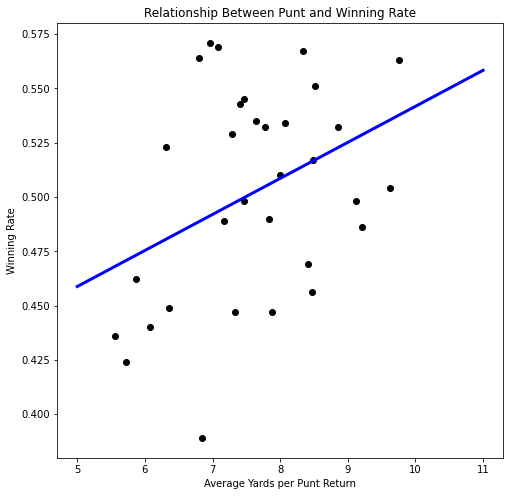

In [73]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y = punt["Winning Rate"], x = punt["Average Yards Per Return"], color = 'k')
ax.plot(xx3, best_line3, color='b', lw=3)
plt.xlabel("Average Yards per Punt Return")
plt.ylabel("Winning Rate")
plt.title("Relationship Between Punt and Winning Rate")

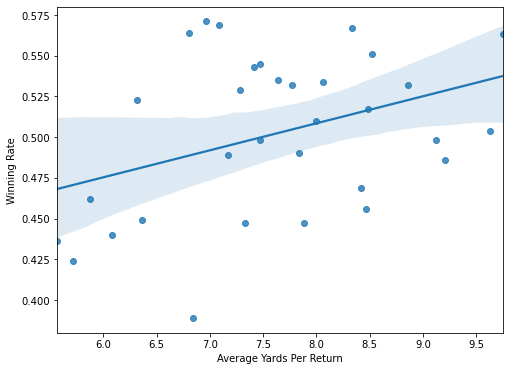

In [74]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x= "Average Yards Per Return", y= "Winning Rate", data=punt )
fig.savefig("../img/Punt.png")

## Fumble Stats Below

In [75]:
fumble = pd.read_csv("../data/Career_Stats_Fumbles.csv")

In [76]:
fumble = fumble[fumble["Fumbles Lost"] != "--"]
fumble["Fumbles Lost"] = fumble["Fumbles Lost"].astype('int64')
fumble["Fumbles"] = fumble["Fumbles"].astype('int64')

In [77]:
fumble.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 0 to 11288
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Player Id                     4541 non-null   object
 1   Name                          4541 non-null   object
 2   Position                      1404 non-null   object
 3   Year                          4541 non-null   int64 
 4   Team                          4541 non-null   object
 5   Games Played                  4541 non-null   int64 
 6   Fumbles                       4541 non-null   int64 
 7   Fumbles Lost                  4541 non-null   int64 
 8   Forced Fumbles                4541 non-null   object
 9   Own Fumbles Recovered         4541 non-null   object
 10  Opponent Fumbles Recovered    4541 non-null   object
 11  Own Fumble Return Yards       4541 non-null   object
 12  Opponent Fumble Return Yards  4541 non-null   object
 13  Fumble Return TDs

In [78]:
fumble = fumble.merge(team_list)
fumble = fumble.groupby("Team").mean()
fumble = fumble.rename(columns={"Rate":"Winning Rate", "Fumbles Lost": "Average # of Fumbles Lost"})

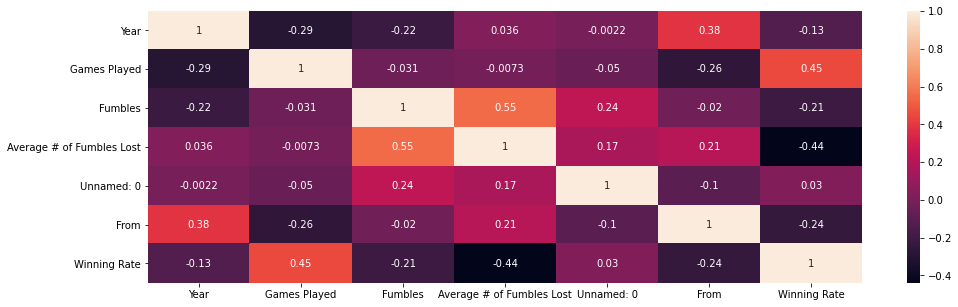

In [79]:
corr_heatmap(fumble)

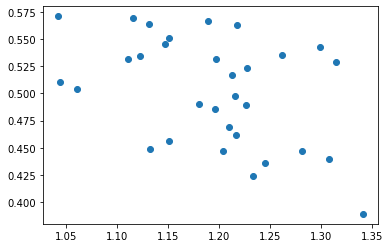

In [80]:
plt.scatter(fumble["Average # of Fumbles Lost"], fumble["Winning Rate"])


In [81]:
x4 = fumble["Winning Rate"]
y4 = sm.add_constant(fumble["Average # of Fumbles Lost"])
a4 = sm.OLS(x4,y4)
b4 = a4.fit()
b4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Winning Rate   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     6.913
Date:                Wed, 04 Nov 2020   Prob (F-statistic):             0.0135
Time:                        01:02:21   Log-Likelihood:                 52.985
No. Observations:                  31   AIC:                            -102.0
Df Residuals:                      29   BIC:                            -99.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.8410      0.129      6.515      0.000       0.577       1.105
Average # of Fumbles Lost    -0.2839      0.108     -2.629      0.014      -0.505      -0.063
==============================================================================
Omnibus:                        6.696   Durbin-Watson:                   2.532
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.009
Skew:                          -0.028   Prob(JB):                        0.366
Kurtosis:                       1.754   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
b4.params

const                        0.841027
Average # of Fumbles Lost   -0.283874
dtype: float64

In [83]:
b4.predict([1,1])

array([0.55715325])

In [84]:
xx4 = np.linspace(1,1.4,100)
best_line4 =b4.params['const'] + b4.params["Average # of Fumbles Lost"]*xx4

Text(0.5, 1.0, 'Relationship Lost Fumble and Winning Rate')

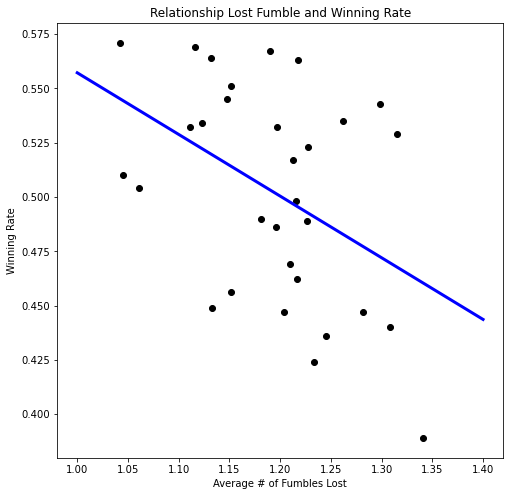

In [85]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y = fumble["Winning Rate"], x = fumble["Average # of Fumbles Lost"], color = 'k')
ax.plot(xx4, best_line4, color='b', lw=3)
plt.xlabel("Average # of Fumbles Lost")
plt.ylabel("Winning Rate")
plt.title("Relationship Lost Fumble and Winning Rate")

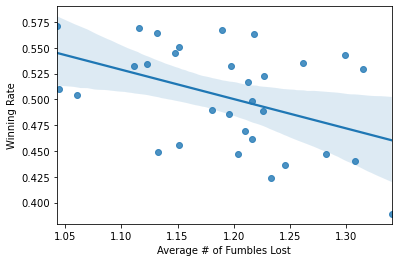

In [86]:
sns.regplot(x= "Average # of Fumbles Lost", y= "Winning Rate", data=fumble )
fig.savefig("../img/Fumble.png")

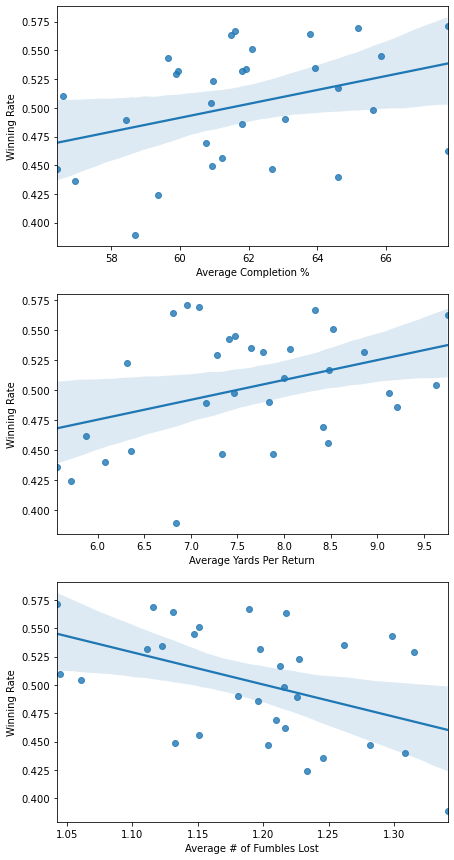

In [87]:
fig = plt.figure(figsize = (7,15))

plt.subplot(3, 1, 1)
sns.regplot(x= "Average Completion %", y= "Winning Rate", data=QB )


plt.subplot(3, 1, 2)
sns.regplot(x= "Average Yards Per Return", y= "Winning Rate", data=punt )

plt.subplot(3, 1, 3)
sns.regplot(x= "Average # of Fumbles Lost", y= "Winning Rate", data=fumble )


fig.savefig('../img/SingleFeature.png')

## Partial Regression Based on the 3 Factors above

In [88]:
bigdf = pd.concat([QB, punt, fumble], axis =1)

In [89]:
bigdf = bigdf[["Winning Rate", "Average Completion %", "Average # of Fumbles Lost", "Average Yards Per Return"]]
bigdf = bigdf.rename(columns = {"Average Completion %": "Average Completion Percentage", "Average # of Fumbles Lost" : "Average Number of Fumbles Lost"})

In [90]:
bigdf = bigdf.loc[:,~bigdf.columns.duplicated()]

In [91]:
bigdf = bigdf.dropna()

In [92]:
part_regress = sfm.ols('Q ("Winning Rate") ~ Q("Average Completion Percentage") + Q("Average Number of Fumbles Lost") + Q("Average Yards Per Return")', data = bigdf).fit()
part_regress.params


Intercept                              0.283286
Q("Average Completion Percentage")     0.005176
Q("Average Number of Fumbles Lost")   -0.177058
Q("Average Yards Per Return")          0.014572
dtype: float64

## Fumbles  > Punt > Completion % 

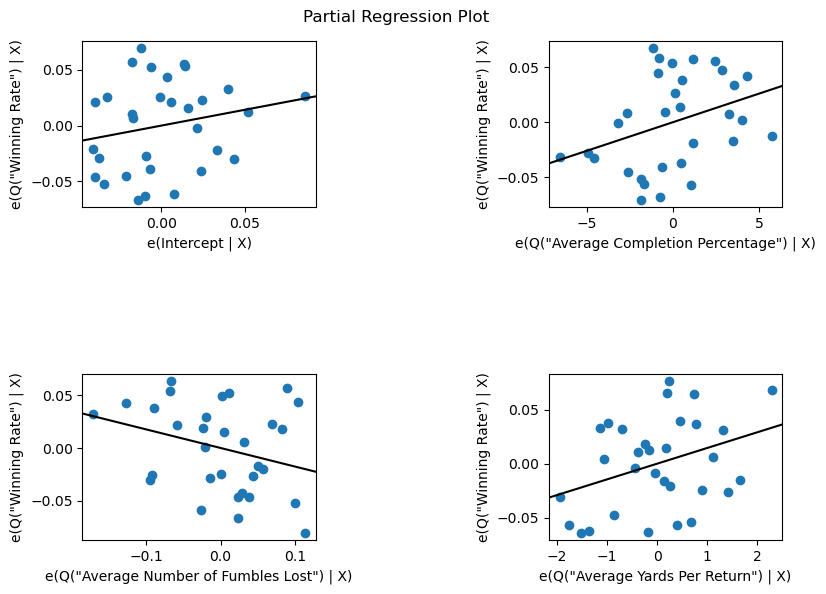

In [101]:
fig = plt.figure(figsize=(8,6))
fig = sm.graphics.plot_partregress_grid(part_regress, fig=fig)
_= ax.set_ylabel("Winning Rate")
_= ax.set_xlabel("Average Completion Percentage")
_= ax.set_title("Linear Regression")
fig.tight_layout(pad=1)
plt.subplots_adjust(wspace=1,hspace=1)
plt.savefig("../img/PartialRegression.png")

In [102]:
# Can I make some 3D Regression models? 

In [103]:
bigdf.head()

,Winning Rate,Average Completion Percentage,Average Number of Fumbles Lost,Average Yards Per Return
Arizona Cardinals,0.424,59.360000,1.233333,5.715789
Atlanta Falcons,0.440,64.611111,1.308271,6.083117
Baltimore Ravens,0.563,61.488889,1.217742,9.752941
Buffalo Bills,0.469,60.766667,1.210191,8.417708
Carolina Panthers,0.489,58.433333,1.226277,7.166667


In [104]:
bigdf.shape

(31, 4)

In [105]:
x = bigdf["Average Number of Fumbles Lost"]
y = bigdf["Average Yards Per Return"]
z = bigdf["Winning Rate"]
X = bigdf[["Average Number of Fumbles Lost", "Average Yards Per Return"]]
Y= z

x_pred = np.linspace(1, 1.6, 30)   
y_pred = np.linspace(4, 10, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [106]:
ols = linear_model.LinearRegression()
model = ols.fit(bigdf[["Average Number of Fumbles Lost", "Average Yards Per Return"]], z )
predicted = model.predict(model_viz)


In [107]:
r2 = model.score(X, Y)

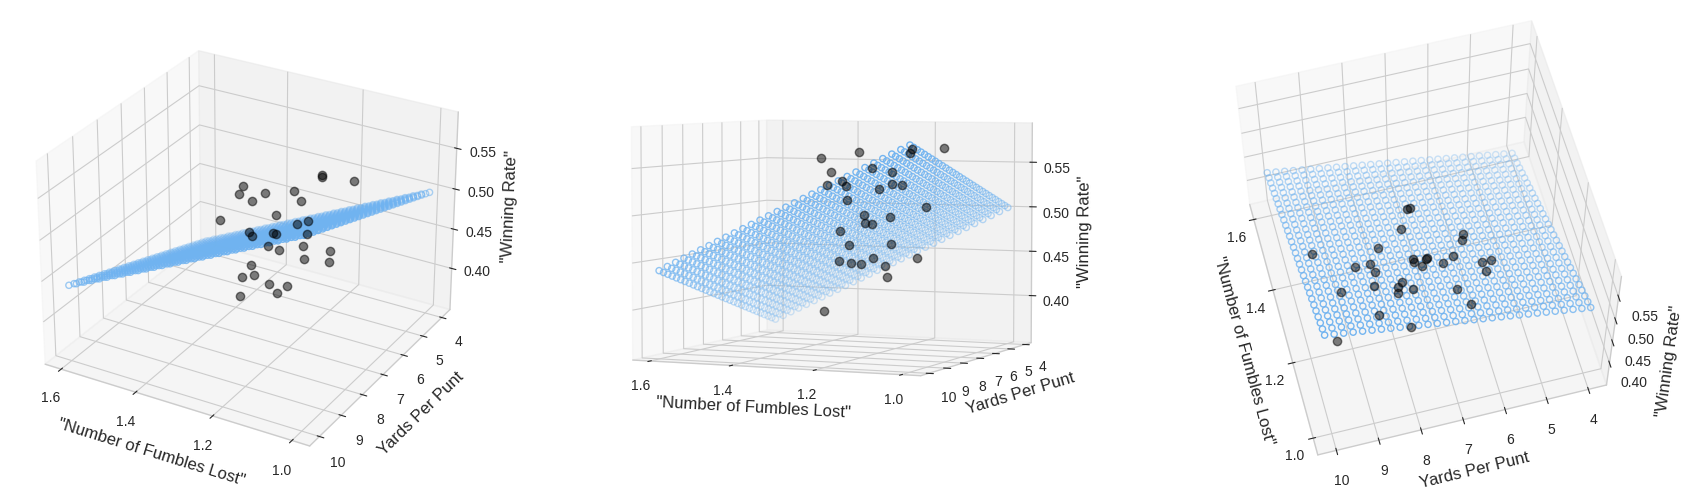

In [118]:

plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('"Number of Fumbles Lost"', fontsize=12)
    ax.set_ylabel("Yards Per Punt", fontsize=12)
    ax.set_zlabel('"Winning Rate"', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

# fig.suptitle('Fumbles Lost and Punt Affecting Winning Rate', fontsize=10)

fig.tight_layout()
plt.savefig("../img/3DPartialR.png")